In [11]:
# Standard imports
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Configuration (tuned for your RTX 3050 with 4GB VRAM)
IMAGE_SIZE = 256      # Input image dimension
BATCH_SIZE = 16       # Safe for 4GB GPU memory
EPOCHS = 30           # Max epochs (we'll stop early if needed)
n_classes = 40        # Must match number of subfolders in "Train"

In [12]:

print("TensorFlow version:", tf.__version__)
print("GPUs available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<div><strong><u> Import and Libraries</u></strong></div>
<p> Load all the libraries needed for deep learning, image preprocessing, visualization, and dataset splitting.</p></br>
<div><b>What is TensorFlow?</b></div>
<p>TensorFlow is a powerful framework used for building and training deep learning models. This imports the TensorFlow library and assigns it the short name tf.</p>
<p> <i>In this project (plant disease detection), TensorFlow is used to create the CNN (Convolutional Neural Network) model that will classify images of plant leaves into “healthy” or “diseased” categories.</i></p>
<br/>
<div> <b> TensorFlow.Keras</b></div>
<p> This imports two important modules from TensorFlow’s Keras API:<br/>
-> models: used to define neural network architectures (Sequential or Functional). <br/>
-> layers: used to add building blocks (Dense, Conv2D, Flatten, Dropout, etc.) into the network. </p>
<p><i> In this project, we will design a CNN using layers like convolution, pooling, and dense layers. We need models to actually build and organize these layers into a complete neural network.</i></p>
<br/>
<div> <b> matplotlib.pyplot</b></div>
<p> Imports the plotting library matplotlib.pyplot and names it plt.</p>
<div><i> We will use this to visualize plant leaf images and to plot training graphs (like accuracy vs. loss). This makes it easier to understand how well the model is learning.</i></div>
<br/>
<div> <b>Why is Numpy?</b></div>
<p> Imports the NumPy library and assigns it the short name np. NumPy provides tools for handling arrays, matrices, and mathematical operations efficiently.
<div><i>Plant disease detection involves image data, which are essentially arrays of pixel values. NumPy allows us to convert images into arrays, perform normalization, and manipulate image data before feeding them into the neural network.</i></div>
<br/>
<div><b> OpenCV </b></div>
<p> Imports OpenCV, a library for image and video processing. cv2 is the standard alias used for OpenCV functions.</p>
<div><i>In this project, we use OpenCV to read images, resize them, convert color spaces, apply filters, and enhance leaf images. Preprocessing is crucial to improve CNN accuracy, especially when images vary in size, orientation, or lighting.</i></div>

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Data_sets\\Train",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Data_sets\\validate",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int',
    seed=123
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "Data_sets\\test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int',
    seed=123
)

# Verify class count
class_names = train_ds.class_names
assert len(class_names) == n_classes, f"Expected {n_classes} classes, found {len(class_names)}"
print(f"✅ Loaded {len(class_names)} classes")


Found 65153 files belonging to 40 classes.
Found 8134 files belonging to 40 classes.
Found 8167 files belonging to 40 classes.
✅ Loaded 40 classes


<div><strong><u> Dataset Setup</u></strong></div>
<p> Load images from folders and create TensorFlow datasets. Provides automatic labeling from folder names and batching for training efficiency.</p><br/>
<div><b> Why we need to use IMAGE_SIZE </b></div>
<p> Neural networks require uniform image sizes for input. Resizing all leaf images to 256x256 ensures consistency and reduces computational load while preserving important features.</p>
<br/>
<div><b> What is Batch size ? </b></div>
<p>Training on smaller batches instead of the full dataset improves memory efficiency. Batch size affects training stability and speed.</p>
<br/>
<div><b> EPOCHS </b></div>
<p> Sets the number of times the model will iterate over the entire training dataset.More epochs allow the model to learn more patterns from the data.
Too few epochs → underfitting; too many → overfitting.</p>
<br/>
<div><b> what does this do "tf.keras.preprocessing.image_dataset_from_directory" </b></div>
<p> Loads images from the "Data_sets\\Train" folder as a TensorFlow dataset. Resizes each image to IMAGE_SIZE x IMAGE_SIZE and groups them into batches of BATCH_SIZE.<p>
<p><i> This function automatically labels images based on folder names (e.g., “healthy”, “diseased”).
Returns a tf.data.Dataset object, which can be directly used for training a TensorFlow model.</i></p>


In [4]:
class_names = train_ds.class_names # uses to retrive the class names(folder names) from data set
print(class_names)
len(train_ds)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Banana  leaf healthy', 'Banana Scab Moth', 'Banana_Black Leaf Streak', 'Banana_Black Sigatoka', 'Banana_Panama Disease', 'Banana_pestalotiopsis', 'Corn (maize)_healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Hibiscus_Healthy_Leaf', 'Hibiscus_Leaf Scorch or Drought Stress', 'Hibiscus_Nitrogen Deficiency', 'Hibiscus_Watering Issues and Environmental Stress', 'Potato___Early_blight', 'Potato___Late_blight', 'Rose_Rust', 'Rose_healthy', 'Rose_sawfly_Rose_slug', 'Tomato Insect Damage', 'Tomato Leaf Miner', 'Tomato healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Toma

4073

In [5]:
class_names = val_ds.class_names
print(class_names)
len(val_ds)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Banana  leaf healthy', 'Banana Scab Moth', 'Banana_Black Leaf Streak', 'Banana_Black Sigatoka', 'Banana_Panama Disease', 'Banana_pestalotiopsis', 'Corn (maize)_healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Hibiscus_Healthy_Leaf', 'Hibiscus_Leaf Scorch or Drought Stress', 'Hibiscus_Nitrogen Deficiency', 'Hibiscus_Watering Issues and Environmental Stress', 'Potato___Early_blight', 'Potato___Late_blight', 'Rose_Rust', 'Rose_healthy', 'Rose_sawfly_Rose_slug', 'Tomato Insect Damage', 'Tomato Leaf Miner', 'Tomato healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Toma

509

In [14]:
class_names = test_ds.class_names
print(class_names)
len(test_ds)
import json

# Assuming you already have class_names = train_ds.class_names or similar
with open("class_names.json", "w") as f:
    json.dump(class_names, f)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Banana  leaf healthy', 'Banana Scab Moth', 'Banana_Black Leaf Streak', 'Banana_Black Sigatoka', 'Banana_Panama Disease', 'Banana_pestalotiopsis', 'Corn (maize)_healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Hibiscus_Healthy_Leaf', 'Hibiscus_Leaf Scorch or Drought Stress', 'Hibiscus_Nitrogen Deficiency', 'Hibiscus_Watering Issues and Environmental Stress', 'Potato___Early_blight', 'Potato___Late_blight', 'Rose_Rust', 'Rose_healthy', 'Rose_sawfly_Rose_slug', 'Tomato Insect Damage', 'Tomato Leaf Miner', 'Tomato healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Toma

<div><u><strong> Data Optimization </strong></u></div>
<p> Optimize dataset pipeline for memory usage, training speed, and randomness.</p><br/>
<div><b> What is cache() </b></div>
<p> cache() → stores the dataset in memory after the first epoch so that it loads faster in subsequent epochs. </p>
<div><b> what is shuffle(1000)</b></div>
<p> shuffle(1000) → randomly shuffles 1000 images at a time to improve training randomness.</p>
<div> <b> what this line do "prefetch(buffer_size=tf.data.AUTOTUNE)"</b></div>
<p> allows the GPU to fetch the next batch while the current batch is being processed, improving training speed.</p>
<div><b> What is shuffle(5000)</b></div>
<p>shuffle(buffer_size=N) keeps N images in memory and randomly picks one from them.
<br/>
Larger N → better randomness, but uses more RAM.
<br/>
Smaller N → less randomness, but lighter on memory.</p>


<div><strong><u> Image Preprocessing (Resizing & Rescaling)</u></strong></div>
<p>->  Creates a small sequential preprocessing model called resize_and_rscale.
<br/>
-> layers.Resizing(IMAGE_SIZE, IMAGE_SIZE) → resizes all input images to 256×256 pixels (or whatever IMAGE_SIZE is).
<br/>
-> layers.Rescaling(1.0/255) → scales pixel values from 0–255 to 0–1 (normalization).
<br/><br/>
<p><i>→ CNNs require uniform image size, so resizing ensures all images are the same shape.
<br/>
→ Normalizing pixel values speeds up learning and helps the model converge faster.
<br/>
→ By putting these two steps in a Sequential layer, preprocessing can be applied automatically during training.</p>

In [6]:
def normalize(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Use LOW parallelism for Windows stability
train_ds = train_ds.map(normalize, num_parallel_calls=2)
val_ds = val_ds.map(normalize, num_parallel_calls=2)
test_ds = test_ds.map(normalize, num_parallel_calls=2)

# Optimize pipeline
train_ds = train_ds.shuffle(500).prefetch(1)
val_ds = val_ds.prefetch(1)
test_ds = test_ds.prefetch(1).apply(tf.data.experimental.ignore_errors())


<div><strong><u> Data Augmentation </u></strong></div>
<p>→ Creates a sequential model that performs real-time data augmentation.
<br/>
→ layers.RandomFlip("horizontal_and_vertical") → randomly flips images horizontally (left-right) and vertically (up-down).
<br/>
→ layers.RandomRotation(0.2) → randomly rotates images by up to 20% of a full circle (≈72 degrees).</p>

<b> Why</b>
<p><i>→ Augmentation increases the diversity of training images without collecting more data.
<br/>
→ Plant leaves can appear at different angles and orientations in real-world scenarios.
<br/>
→ This prevents overfitting, making the model more robust and generalizable.</i></p>
<b> Note </b>
<p>Keep augmentation only for training data, not for validation/test sets (they should represent real-world unseen data). If your system slows down, reduce rotation (e.g., 0.1) or avoid stacking too many augmentation layers.</p>

In [8]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    
    # Block 2
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    # Block 3
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    # Block 4
    layers.Conv2D(256, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    # Classifier head
    layers.GlobalAveragePooling2D(),  # Better than Flatten() for small datasets
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),              # Prevents overfitting
    layers.Dense(n_classes, activation="softmax")  # Output probabilities
])

# Compile model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [9]:
print(train_ds)
print(val_ds)


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
print("\n🚀 Starting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,     
    verbose=1
)


🚀 Starting training...
Epoch 1/30
4073/4073 [==============================] - 348s 77ms/step - loss: 1.8724 - accuracy: 0.4414 - val_loss: 0.8573 - val_accuracy: 0.7261
Epoch 2/30
4073/4073 [==============================] - 257s 58ms/step - loss: 0.8131 - accuracy: 0.7385 - val_loss: 0.5981 - val_accuracy: 0.8090
Epoch 3/30
4073/4073 [==============================] - 259s 58ms/step - loss: 0.5654 - accuracy: 0.8137 - val_loss: 0.3195 - val_accuracy: 0.8969
Epoch 4/30
4073/4073 [==============================] - 282s 64ms/step - loss: 0.4185 - accuracy: 0.8619 - val_loss: 0.2339 - val_accuracy: 0.9239
Epoch 5/30
4073/4073 [==============================] - 265s 60ms/step - loss: 0.3290 - accuracy: 0.8911 - val_loss: 0.2029 - val_accuracy: 0.9315
Epoch 6/30
4073/4073 [==============================] - 266s 60ms/step - loss: 0.2769 - accuracy: 0.9082 - val_loss: 0.3028 - val_accuracy: 0.9036
Epoch 7/30
4073/4073 [==============================] - 269s 61ms/step - loss: 0.2346 - accura

In [13]:
# 7. EVALUATE ON TEST SET
print("\n🔍 Evaluating on test set...")
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

print(f"\n🎯 FINAL RESULTS:")
print(f"   Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   Test Loss:     {test_loss:.4f}")


🔍 Evaluating on test set...
511/511 [==============================] - 32s 62ms/step - loss: 0.0523 - accuracy: 0.9853

🎯 FINAL RESULTS:
   Test Accuracy: 0.9853 (98.53%)
   Test Loss:     0.0523


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

model.save("Plant_Disease_Detector_Model.h5")


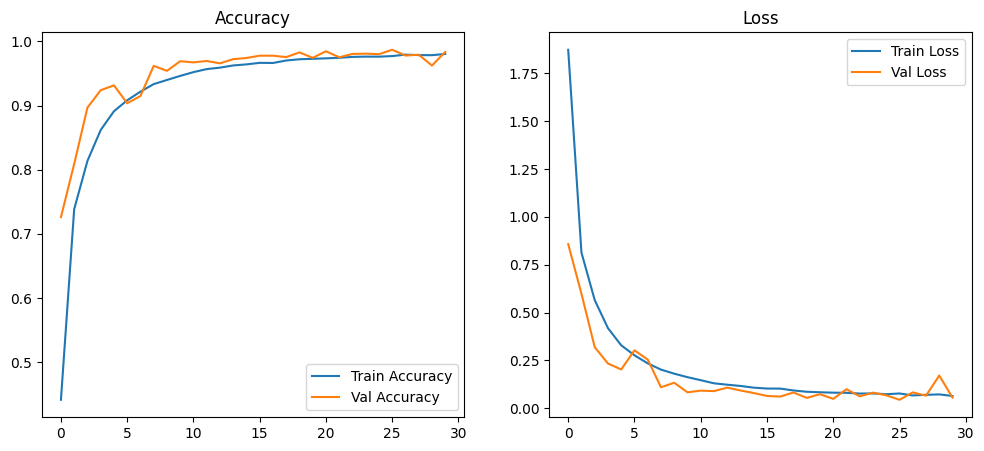

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()
